In [1]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [2]:
from strategies.SimpleRNN import SimpleRNNStrategy
from strategies.LSTM import LSTMStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data_handler = DataHandler(ticker='AAPL', start_date='2020-01-01', end_date='2024-01-01')
data = data_handler.fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



### LSTM

Chapter 3: Using TensorFlow construct a neural network with recursive neurons. Describe the simple RNN but focus on the more powerful LSTM. Consider multi-period forecasting. Analyze same questions as Chapter 2.

#### Prices

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


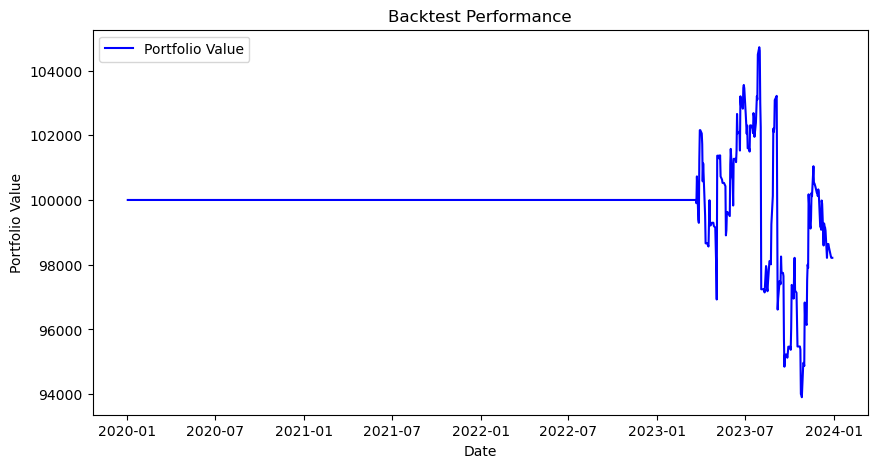

{'Final Value': 98212.6101573491, 'Return': -0.017873898426508994, 'Sharpe Ratio': -0.04299507667532793, 'Max Drawdown': -0.1032827051540709}


In [4]:
# Simple RNN
RNN_strategy = SimpleRNNStrategy()
backtest_RNN = Backtest(data, RNN_strategy)
results_RNN = backtest_RNN.run()
print(results_RNN)

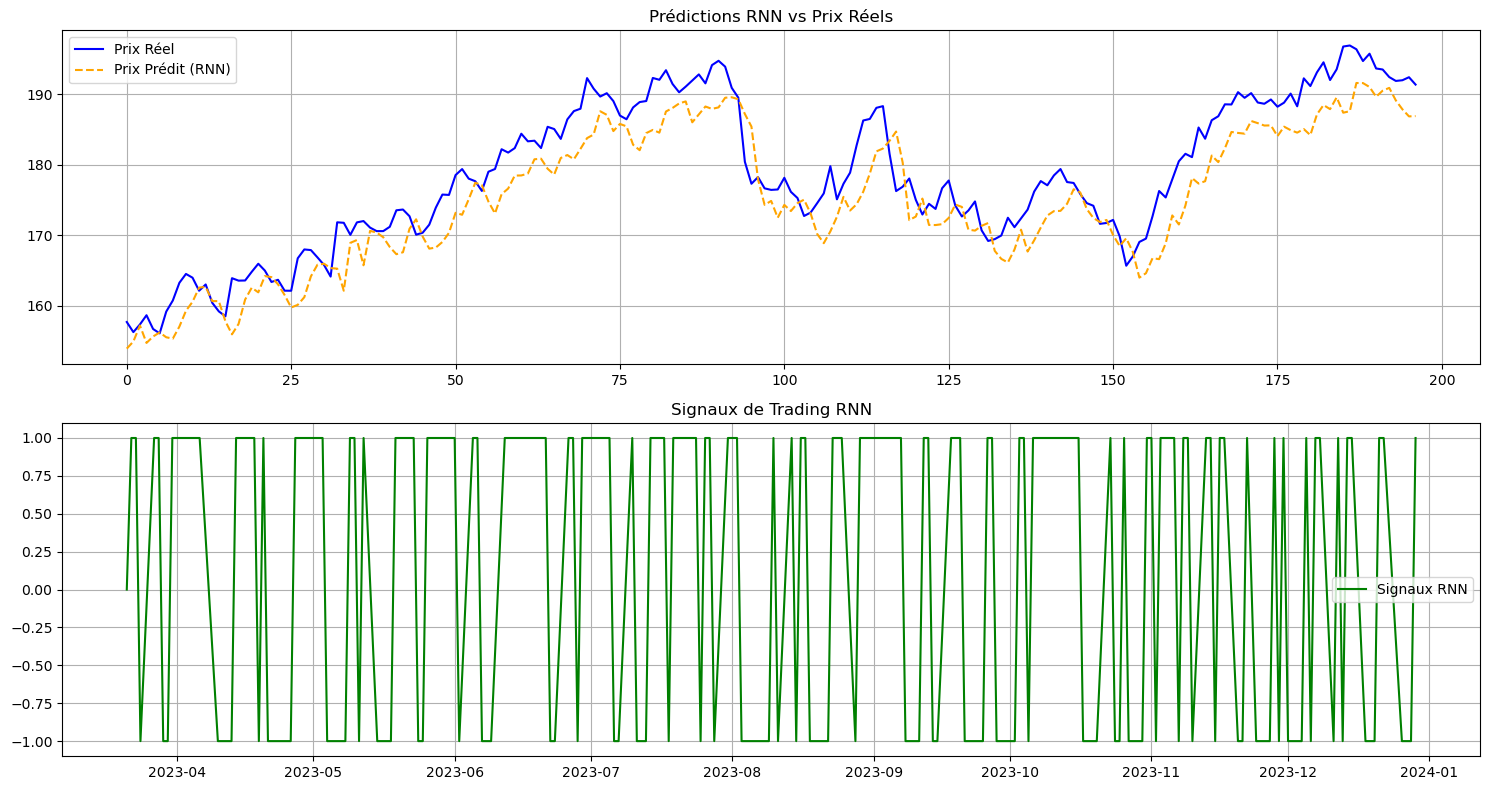


RNN Strategy Statistics:
Nombre de signaux (trades): 196
Répartition des signaux:
 0    810
 1    109
-1     87
Name: count, dtype: int64

Statistiques des prédictions:
Prix prédit moyen: 174.913422
Écart-type prédictions: 9.699912

MSE (Erreur quadratique moyenne): 22.293369

 R²: 0.80


In [5]:
# Récupération des prix réels alignés avec y_test
window_size = RNN_strategy.window_size
test_size = len(RNN_strategy.y_test)
total_seq = len(RNN_strategy.signals) - window_size

real_prices = data['Close'].iloc[window_size + total_seq - test_size : window_size + total_seq].values

# Vérification de l’alignement
assert len(real_prices) == test_size, "Les prix réels ne sont pas alignés avec les prédictions."

# Visualisation
plt.figure(figsize=(15, 8))

# Plot 1: Prédictions vs prix réels
plt.subplot(2, 1, 1)
plt.plot(real_prices, label='Prix Réel', color='blue')
plt.plot(RNN_strategy.y_pred, label='Prix Prédit (RNN)', color='orange', linestyle='--')
plt.title('Prédictions RNN vs Prix Réels')
plt.legend()
plt.grid(True)

# Plot 2: Signaux de trading
plt.subplot(2, 1, 2)
plt.plot(RNN_strategy.signals.iloc[-test_size:], label='Signaux RNN', color='green')
plt.title('Signaux de Trading RNN')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistiques
print("\nRNN Strategy Statistics:")
print(f"Nombre de signaux (trades): {(RNN_strategy.signals != 0).sum()}")
print(f"Répartition des signaux:\n{RNN_strategy.signals.value_counts()}")
print("\nStatistiques des prédictions:")
print(f"Prix prédit moyen: {RNN_strategy.y_pred.mean():.6f}")
print(f"Écart-type prédictions: {RNN_strategy.y_pred.std():.6f}")

# Calcul du MSE
mse_rnn = mean_squared_error(real_prices, RNN_strategy.y_pred)
print(f"\nMSE (Erreur quadratique moyenne): {mse_rnn:.6f}")
print(f"\n R²: {r2_score(real_prices, RNN_strategy.y_pred):.2f}")


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


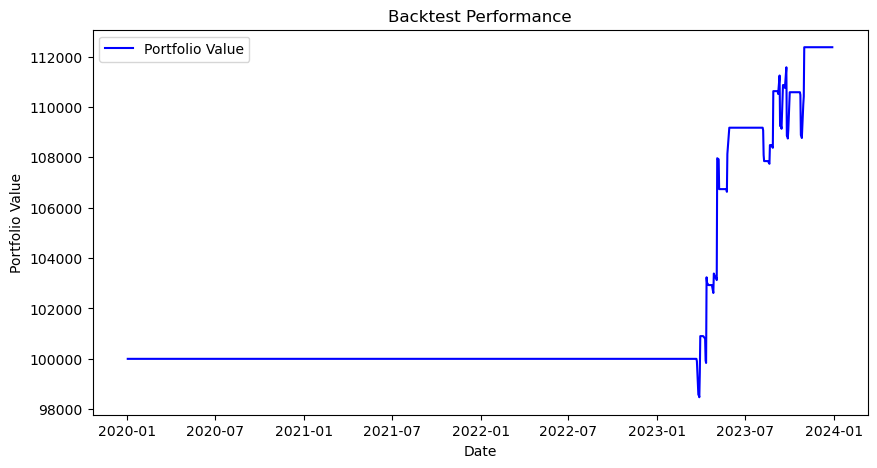

{'Final Value': 112370.85334489463, 'Return': 0.12370853344894628, 'Sharpe Ratio': 0.7133076453382688, 'Max Drawdown': -0.025336914159562518}


In [6]:
# LSTM
LSTM_strategy = LSTMStrategy(n_steps_ahead=1, target_type='price')
backtest_LSTM = Backtest(data, LSTM_strategy)
results_LSTM = backtest_LSTM.run()
print(results_LSTM)

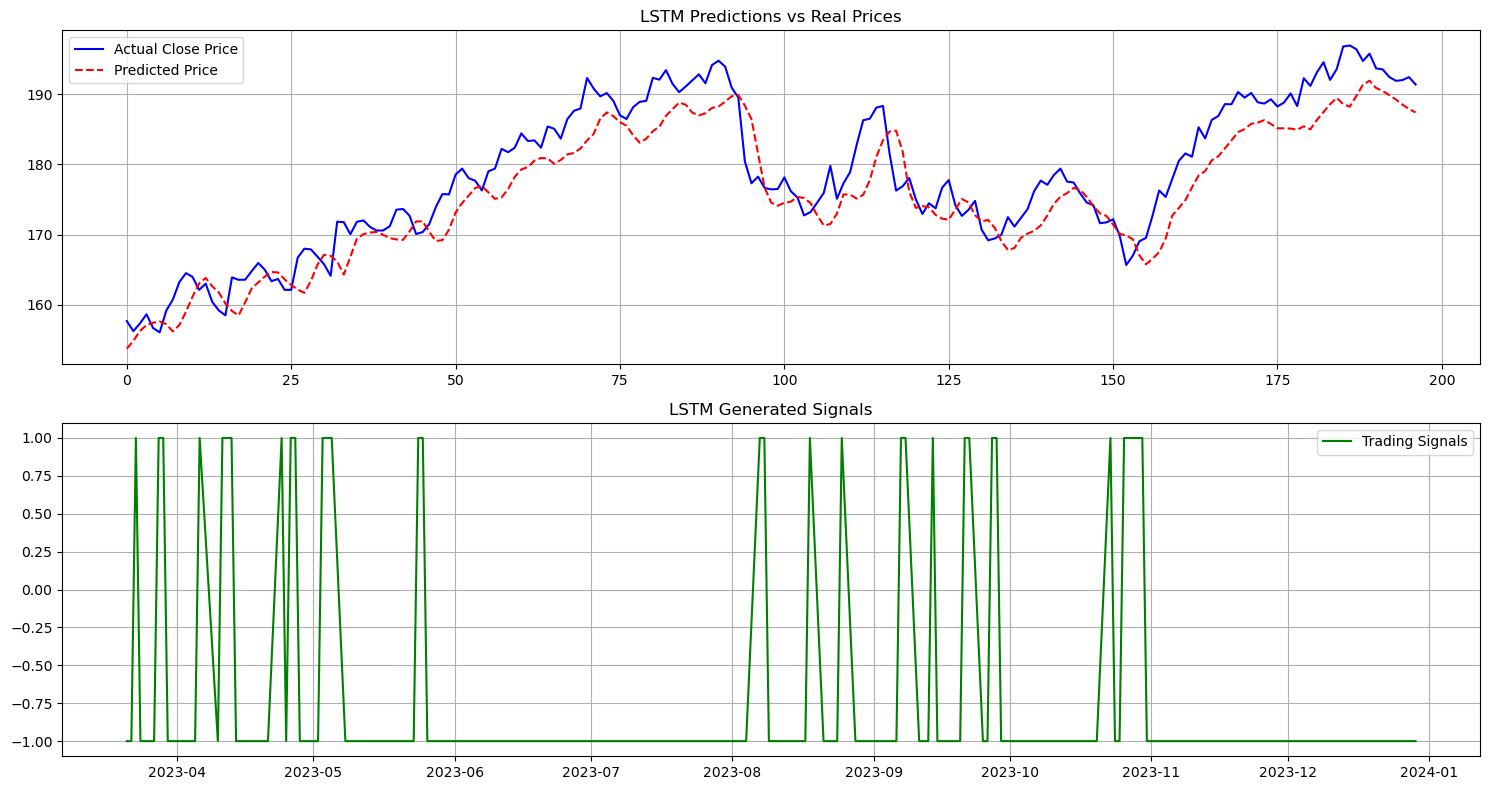


 LSTM Strategy Statistics:
Number of trades: 197
Signal distribution:
 0    809
-1    167
 1     30
Name: count, dtype: int64

 Prediction statistics:
Mean predicted price: 175.596375
Std predicted price: 9.340171

 MSE (Mean Squared Error): 18.764171

 R²: 0.83


In [7]:
# Récupérer les vrais prix de clôture alignés avec y_test
window_size = LSTM_strategy.window_size
test_size = len(LSTM_strategy.y_test)  # correspond à y_pred aussi
total_seq = len(LSTM_strategy.signals) - window_size  # nombre total de y_seq

# Indices des vrais prix correspondant à y_test
real_prices = data['Close'].iloc[window_size + total_seq - test_size : window_size + total_seq].values

# Vérification de la correspondance
assert len(real_prices) == test_size, "Real prices and predictions are not aligned!"

# Tracer les prix réels vs prédictions
plt.figure(figsize=(15, 8))

# Plot 1: Prix réels vs prédictions
plt.subplot(2, 1, 1)
plt.plot(real_prices, label='Actual Close Price', color='blue')
plt.plot(LSTM_strategy.y_pred, label='Predicted Price', color='red', linestyle='--')
plt.title('LSTM Predictions vs Real Prices')
plt.legend()
plt.grid(True)

# Plot 2: Signaux de trading
plt.subplot(2, 1, 2)
plt.plot(LSTM_strategy.signals.iloc[-test_size:], label='Trading Signals', color='green')
plt.title('LSTM Generated Signals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistiques
print("\n LSTM Strategy Statistics:")
print(f"Number of trades: {(LSTM_strategy.signals != 0).sum()}")
print(f"Signal distribution:\n{LSTM_strategy.signals.value_counts()}")
print("\n Prediction statistics:")
print(f"Mean predicted price: {LSTM_strategy.y_pred.mean():.6f}")
print(f"Std predicted price: {LSTM_strategy.y_pred.std():.6f}")

# MSE entre prix réels et prédits
mse = mean_squared_error(real_prices, LSTM_strategy.y_pred)
print(f"\n MSE (Mean Squared Error): {mse:.6f}")
print(f"\n R²: {r2_score(real_prices, LSTM_strategy.y_pred):.2f}")

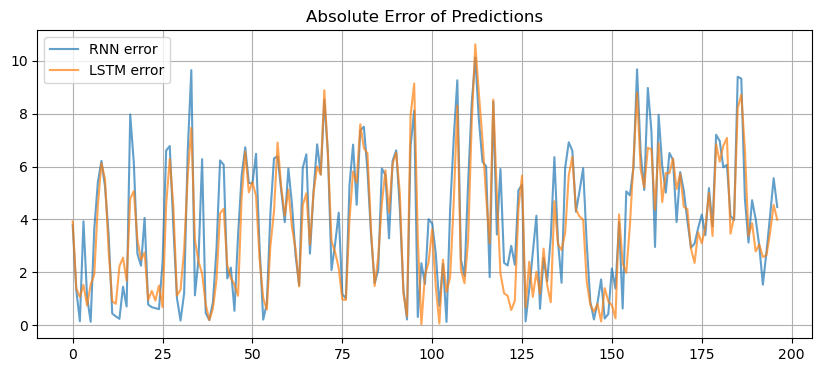

In [8]:
import numpy as np 

plt.figure(figsize=(10,4))
plt.plot(np.abs(real_prices - RNN_strategy.y_pred), label="RNN error", alpha=0.7)
plt.plot(np.abs(real_prices - np.concatenate(LSTM_strategy.y_pred)), label="LSTM error", alpha=0.7)
plt.title("Absolute Error of Predictions")
plt.legend()
plt.grid(True)
plt.show()

#### Multiperiod forecasting

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


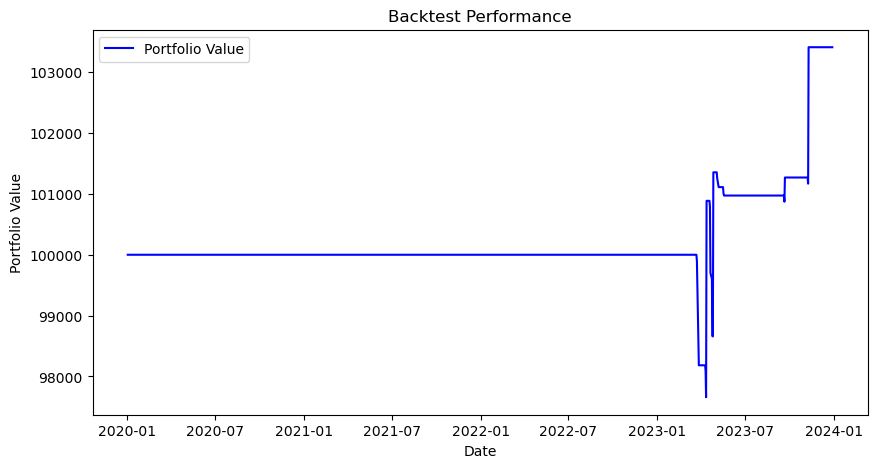

{'Final Value': 103411.62126550301, 'Return': 0.034116212655030065, 'Sharpe Ratio': 0.33296099518518346, 'Max Drawdown': -0.023419887281951657}


In [9]:
# LSTM for 5 steps ahead
LSTM_5_strategy = LSTMStrategy(n_steps_ahead=5)
backtest_LSTM_5 = Backtest(data, LSTM_5_strategy)
results_LSTM_5 = backtest_LSTM_5.run()
print(results_LSTM_5)

Training for 2-step ahead forecasting...


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
MSE (horizon 2): 35.3869
R² (horizon 2): 0.6783
Training for 5-step ahead forecasting...


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
MSE (horizon 5): 68.0205
R² (horizon 5): 0.4002
Training for 10-step ahead forecasting...


c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
MSE (horizon 10): 162.1294
R² (horizon 10): -0.3770


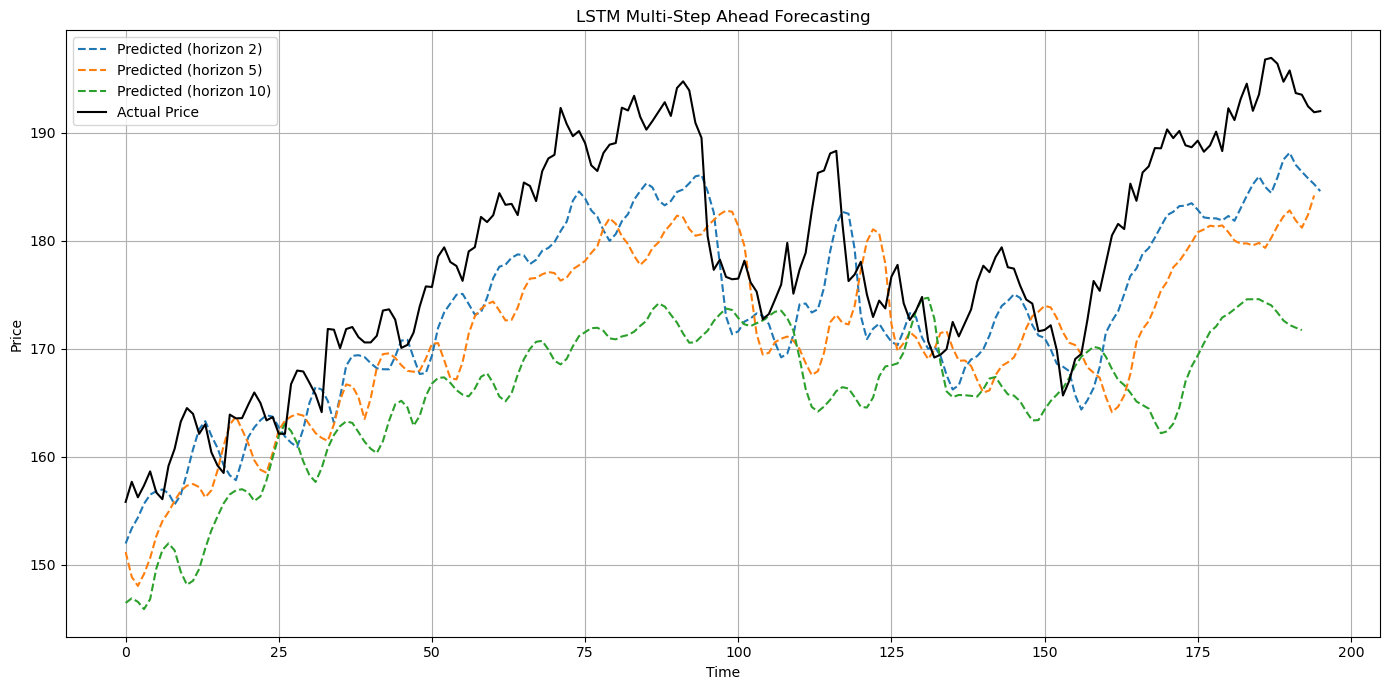

In [10]:
# Paramètres
steps_list = [2, 5, 10]

# Dictionnaires pour stocker les prédictions
predictions = {}
actuals = {}
mses = {}
R_2 = {}

# Boucle sur plusieurs horizons
for steps in steps_list:
    print(f"Training for {steps}-step ahead forecasting...")

    # Initier la stratégie LSTM avec horizon souhaité
    strategy = LSTMStrategy(n_steps_ahead=steps)

    # Générer les signaux et obtenir les prédictions
    strategy.generate_signals(data)

    # Stocker les prédictions (moyenne sur n_steps)
    y_pred_mean = strategy.y_pred.mean(axis=1)
    y_test_last = strategy.y_test[:, -1]  # Dernier vrai prix pour comparaison

    predictions[steps] = y_pred_mean
    actuals[steps] = y_test_last

    # Calcul du MSE et R²
    mse = mean_squared_error(y_test_last, y_pred_mean)
    mses[steps] = mse
    R_2[steps] = r2_score(y_test_last, y_pred_mean)
    print(f"MSE (horizon {steps}): {mse:.4f}")
    print(f"R² (horizon {steps}): {R_2[steps]:.4f}")

# Plot des prédictions
plt.figure(figsize=(14, 7))
for steps in steps_list:
    plt.plot(predictions[steps], label=f'Predicted (horizon {steps})', linestyle='--')
plt.plot(actuals[steps_list[0]], label='Actual Price', color='black')
plt.title('LSTM Multi-Step Ahead Forecasting')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Returns prediction

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


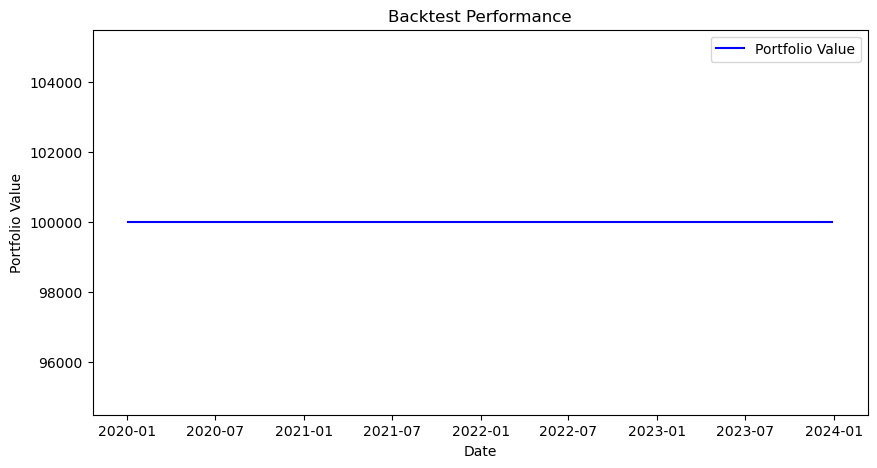

{'Final Value': 100000.0, 'Return': 0.0, 'Sharpe Ratio': nan, 'Max Drawdown': 0.0}


In [11]:
LSTM_strategy_r = LSTMStrategy(n_steps_ahead=1, target_type='return')
backtest_LSTM_r = Backtest(data, LSTM_strategy_r)
results_LSTM_r = backtest_LSTM_r.run()
print(results_LSTM_r)

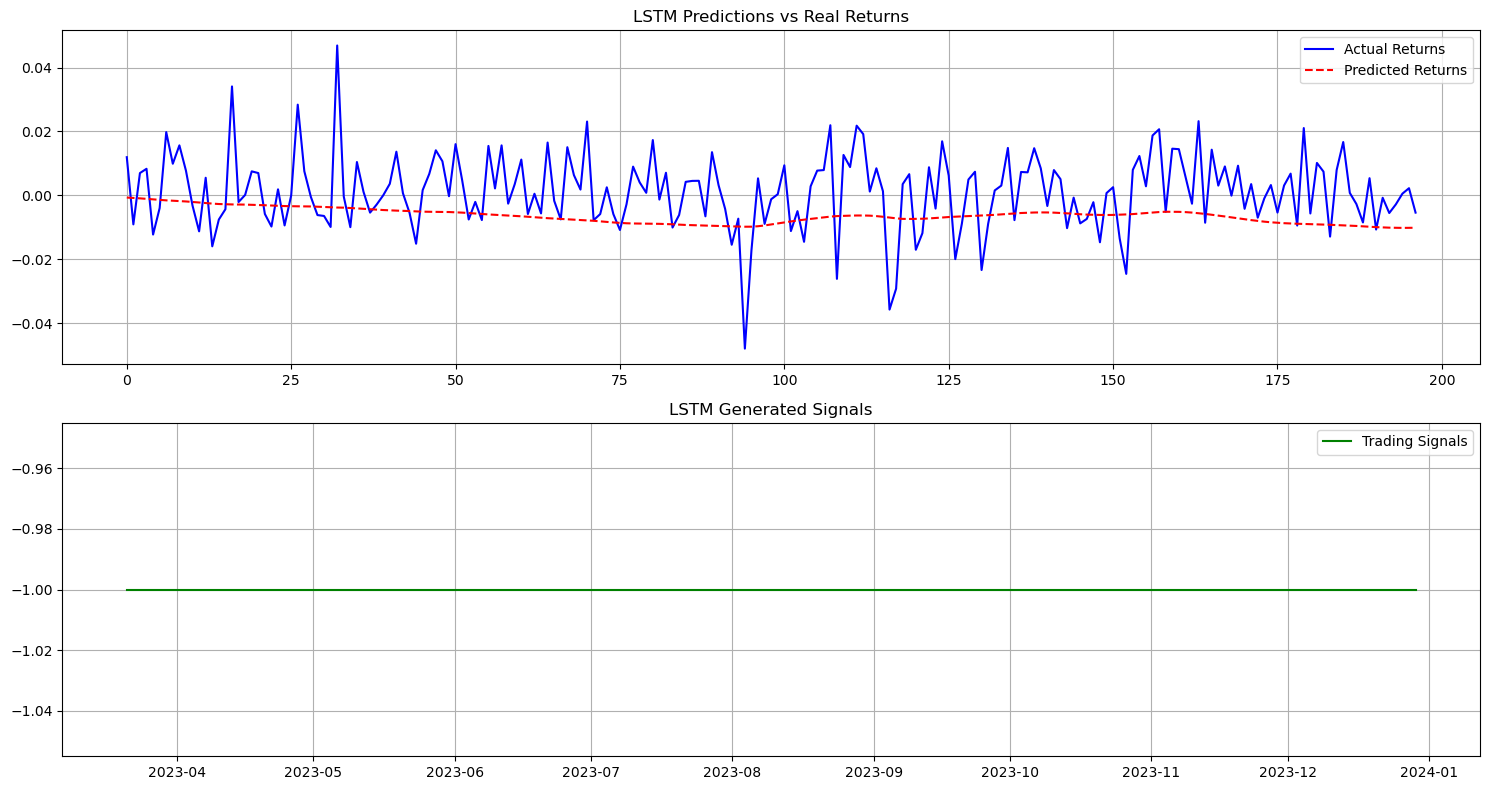


 LSTM Strategy Statistics:
Number of trades: 197
Signal distribution:
 0    809
-1    197
Name: count, dtype: int64

 Prediction statistics:
Mean predicted return: -0.006390
Std predicted return: 0.002337

 MSE (Mean Squared Error): 0.000191

 R²: -0.39


In [12]:
# Récupérer les returns de clôture alignés avec y_test
window_size = LSTM_strategy_r.window_size
test_size = len(LSTM_strategy_r.y_test)  # correspond à y_pred aussi
total_seq = len(LSTM_strategy_r.signals) - window_size  # nombre total de y_seq

# Indices des vrais returns correspondant à y_test
real_returns = data['Close'].pct_change().iloc[-test_size:].values

# Vérification de la correspondance
assert len(real_returns) == test_size, "Real returns and predictions are not aligned!"

# Tracer les returns réels vs prédictions
plt.figure(figsize=(15, 8))

# Plot 1: Returns réels vs prédictions
plt.subplot(2, 1, 1)
plt.plot(real_returns, label='Actual Returns', color='blue')
plt.plot(LSTM_strategy_r.y_pred, label='Predicted Returns', color='red', linestyle='--')
plt.title('LSTM Predictions vs Real Returns')
plt.legend()
plt.grid(True)

# Plot 2: Signaux de trading
plt.subplot(2, 1, 2)
plt.plot(LSTM_strategy_r.signals.iloc[-test_size:], label='Trading Signals', color='green')
plt.title('LSTM Generated Signals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Statistiques
print("\n LSTM Strategy Statistics:")
print(f"Number of trades: {(LSTM_strategy_r.signals != 0).sum()}")
print(f"Signal distribution:\n{LSTM_strategy_r.signals.value_counts()}")
print("\n Prediction statistics:")
print(f"Mean predicted return: {LSTM_strategy_r.y_pred.mean():.6f}")
print(f"Std predicted return: {LSTM_strategy_r.y_pred.std():.6f}")

# MSE et R² entre returns réels et prédits
mse = mean_squared_error(real_returns, LSTM_strategy_r.y_pred)
print(f"\n MSE (Mean Squared Error): {mse:.6f}")
print(f"\n R²: {r2_score(real_returns, LSTM_strategy_r.y_pred):.2f}")
